# Exploratory Data Analysis of the Flu Data

### About the Flu Data

This data is consits of weigthed influenza-like illness (wili) together with the number of weeks in each year for 50 states and some additoinal regions (i.e. New York City).

According to CDC, there are number of influenza surveillance done in the United States. After doing some online research, it seems that this dataset is Outpatient Illness Surveillance, which is one of the surveillances CDC performs.

Looking into the description of this surveillance, CDC explains this surveillance as the following:
> Information on patient visits to health care providers for influenza-like illness is collected through the U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet). ILINet consists of more than 2,700 outpatient healthcare providers in all 50 states, the District of Columbia and the U.S. Virgin Islands reporting more than 30 million patient visits each year. Each week, approximately 1,800 outpatient healthcare providers around the country report data to CDC on the total number of patients seen and the number of those patients with influenza-like illness (ILI).

Therefore, given this explanation, we can assume that the unit for wili in this dataset is percentage who had influenza-like illness.

With that said, let's look into the dataset to learn more about this data.

### Data Analysis

In [21]:
import numpy as np
import pandas as pd
import pandas.io.date_converters as conv
import matplotlib.pyplot as plt
import seaborn as sns
import glob #used for reading multiple csvs

Lets read a sample csv.

In [62]:
test = pd.read_csv('./data/flu_ground_truth/wILI_cleaned_Alabama.csv') 

Lets see what the test data looks like... 
Here, you can see the week of the year as 'time' and weighted influenza-like illness represented as 'wili'.

In [64]:
test

,time,wili
0,2010-40,2.134770
1,2010-41,2.059990
2,2010-42,1.942240
3,2010-43,2.276500
4,2010-44,2.833710
...,...,...
456,2019-27,0.684589
457,2019-28,0.719655
458,2019-29,0.790052
459,2019-30,0.800068


What does the data look like for all areas within this data?

In [67]:
#get paths for all csv
path = "./data/flu_ground_truth"
all_files = glob.glob(path + "/wILI_cleaned_*.csv")

#store location name
areas = []

#parser when reading the dates...not used anymore
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%U')#year-week format

In [68]:
#build the list of areas
for i in range(0, len(all_files)):
    temp_df = pd.read_csv(all_files[i], parse_dates=['time'], date_parser=dateparse)
    name = all_files[i][37: - 4]#gets all state / city names...simple slicing!
    #name = name.replace(' ', '_')#replace space with underscore
    areas.append(name)
    new_temp_df = temp_df.rename(columns = {'time': name + '_time', 'wili': name + '_wili'})
    #df_li.append(new_temp_df)

In [69]:
#construct a single dataframe
flu = pd.DataFrame()
for filename in all_files:
    name = filename[37: - 4]
    newdf = pd.read_csv(filename)
    newdf["area"]=name
    flu = flu.append(newdf)
flu.time = flu["time"].apply(lambda x: pd.to_datetime(x[:4], format='%Y') + pd.to_timedelta(str(int(x[5:])*7 )+ ' days'))

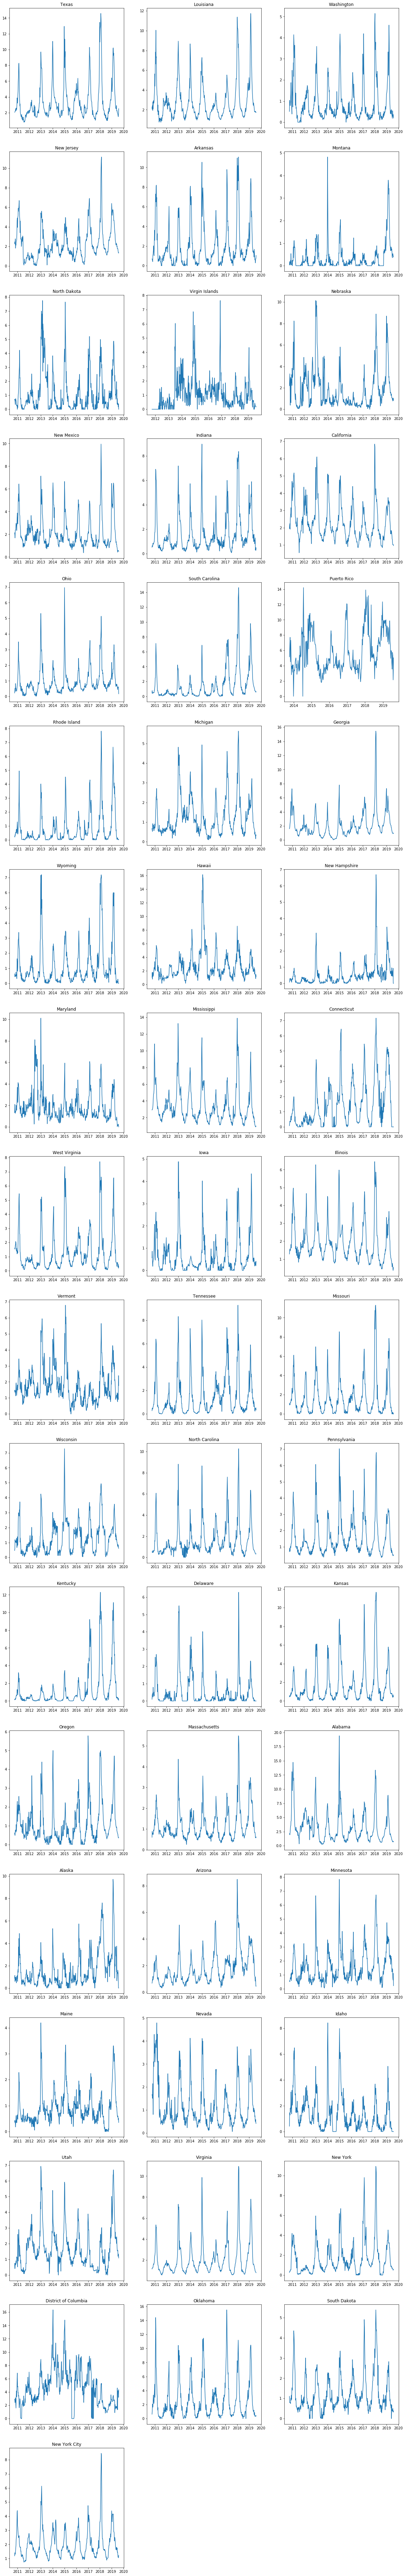

In [70]:
#let's plot all areas
nrows = 20
ncols = 3
num = 1

plt.figure(figsize=(20,150))

while num < nrows * ncols and num < lengthArea:
    plt.subplot(nrows, ncols, num)
    plt.plot(flu[flu.area == areas[num-1]]['time'], flu[flu.area == areas[num-1]]['wili']);
    plt.title(areas[num - 1])
    num += 1

Looking at this, we can observe that there is a spike of influenza-like illness each year, and also the peak of the spike is different from year to year. Also, we can observe that each state/region have different patterns in terms of how the peak appears.

This leads to another question how different the pattern is in cold and warm places in the United States. As a sample, we are going to plot Hawaii vs Maine. Observing the data, we can see that Hawaii, which is a lot warmer area has a larger wili.

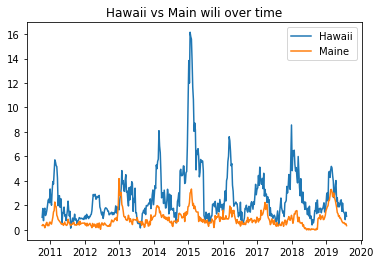

In [88]:
#let's try to plot Hawaii vs Maine
areas[19]#Hawaii
areas[42]#Main
#areas
plt.plot(flu[flu.area == areas[19]]['time'], flu[flu.area == areas[19]]['wili'], label = 'Hawaii')
plt.plot(flu[flu.area == areas[42]]['time'], flu[flu.area == areas[42]]['wili'], label = 'Maine')
plt.title('Hawaii vs Main wili over time')
plt.legend()

Looking at this graph leads to another question if the patterns are consistent with warmer / colder reagions in general. To see whether if this is true or not, we are going to group the states/regions of the United States based on the climate. 

Looking at the image below which shows different U.S. climate regions, we are roughly going to categorize warm / cold states by pikcing the states facing Canadian border as the "cold" states and states facing Mexican borders & ocean as the "warm" states.

In [94]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://www.ncdc.noaa.gov/monitoring-references/maps/images/us-climate-regions.gif")

In [95]:
cold = ['Washington', 'Idaho', 'Montana', 'North Dakota', 'South Dakota', 'Minnesota', 'Michigan', 'Ohio', 'Pennsylvania', 'New York', 'New York City', 'Vermont', 'New Hampshire', 'Maine']
warm = ['California', 'Arizona', 'New Mexico', 'Texas', 'Lousiana', 'Mississippi', 'Alabama', 'Florida', 'Hawaii']

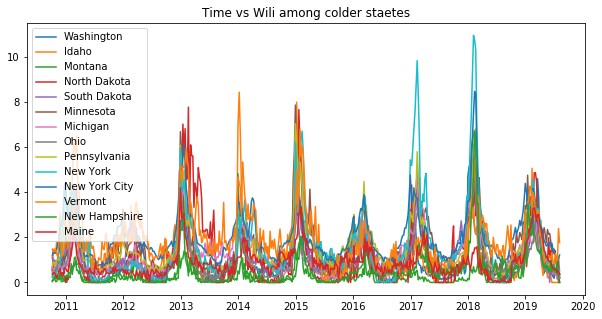

In [102]:
plt.figure(figsize=(10, 5))

for i in range(0, len(cold)):
    plt.plot(flu[flu.area == cold[i]]['time'], flu[flu.area == cold[i]]['wili'], label = cold[i])
    plt.title("Time vs Wili among colder staetes")
    plt.legend()

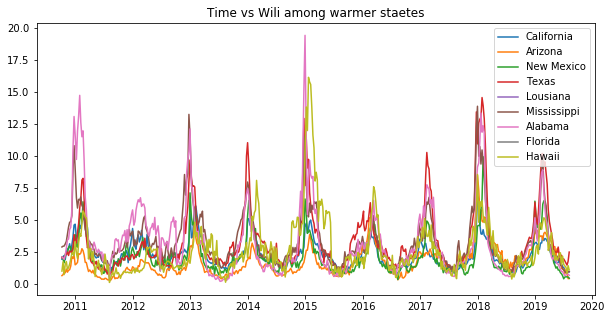

In [103]:
plt.figure(figsize=(10, 5))

for i in range(0, len(warm)):
    plt.plot(flu[flu.area == warm[i]]['time'], flu[flu.area == warm[i]]['wili'], label = warm[i])
    plt.title("Time vs Wili among warmer staetes")
    plt.legend()

While not entirely aligned it does seem that the warmer states have a higher rate of wili.

Another question that comes to mind is that whether the population of the state makes a difference. To see this, we are going to pick few states that have the highest / lowest population and see if there is a visible difference.

In [106]:
high = ['California', 'New York', 'New York City']
low = ['Wyoming', 'Vermont', 'Alaska']

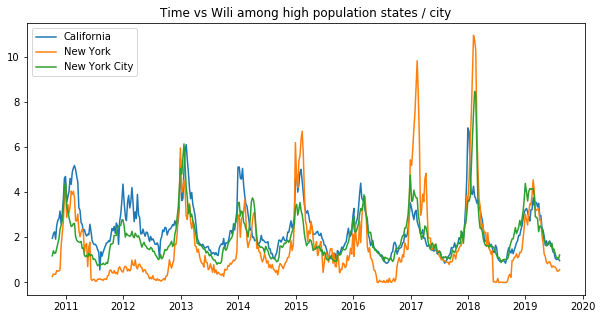

In [108]:
plt.figure(figsize=(10, 5))

for i in range(0, len(high)):
    plt.plot(flu[flu.area == high[i]]['time'], flu[flu.area == high[i]]['wili'], label = high[i])
    plt.title("Time vs Wili among high population states / city")
    plt.legend()

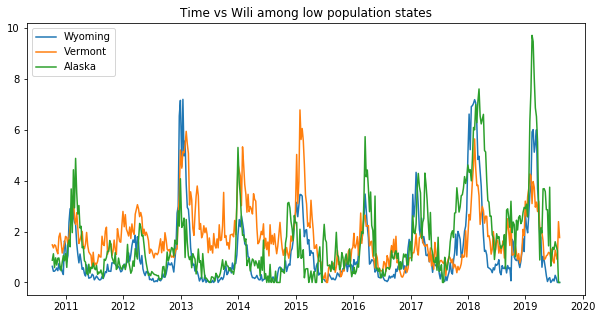

In [109]:
plt.figure(figsize=(10, 5))

for i in range(0, len(low)):
    plt.plot(flu[flu.area == low[i]]['time'], flu[flu.area == low[i]]['wili'], label = low[i])
    plt.title("Time vs Wili among low population states")
    plt.legend()

Looking at this, there is not that much difference.

## Further Questions to Ask

After doing some preliminary data analysis, this yields further question.
* Given that wili is coming from actual numbers reported from the healthcare providers, is wili related to the number of healthcare facilities among states/cities?
* Since the breakdown of this data is still rough (states), does actually the density of population relate to the outcome of wili? If this hypothesis is supported with the wili data, it might be a key figure that could be leveraged for analyzing COVID-19 data later on.